# SPOmiAlign Demo: Image-to-Image Registration (S2 to S1)

**任务**：将源图像 (Source S2) 配准到目标图像 (Target S1)。  
**流程**：
1. 环境配置
2. 读取图像
3. 执行 Affine + B-Spline 配准
4. 结果可视化

In [1]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

# --- 路径配置 ---
sys.path.append("../../SPOmiAlign")
from roma import align_and_process_images

# 绘图设置
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

# 定义辅助绘图函数
def show_img(path, title="Image"):
    if os.path.exists(path):
        img = cv2.imread(path)
        if img is None: return
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print(f"❌ 文件不存在: {path}")

✅ Successfully imported 'rasterize_h5ad_to_image' from data_process.py


WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.9.0+cu128 with CUDA 1208 (you have 2.7.1+cu126)
    Python  3.10.19 (you have 3.12.11)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


Target: ../../SPOmiAlign_Repro/output_image/E15_5-S1-HE.jpg
Source: ../../SPOmiAlign_Repro/output_image/E15_5-S2-HE_warped_rt15.png


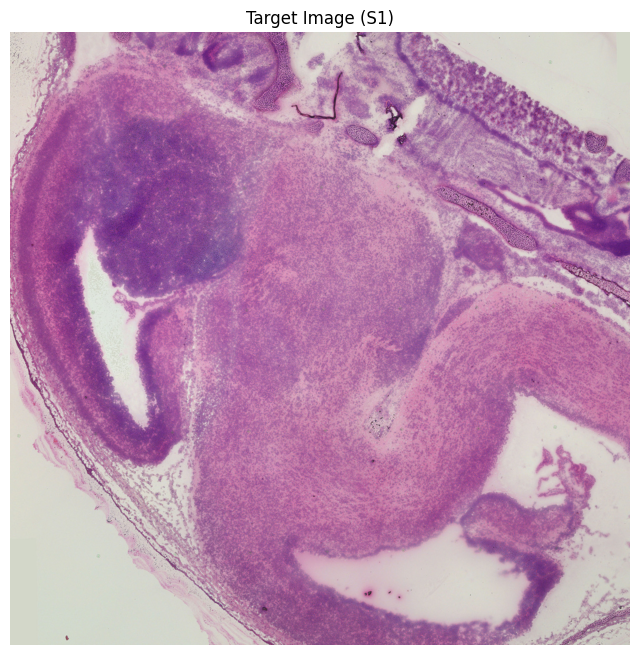

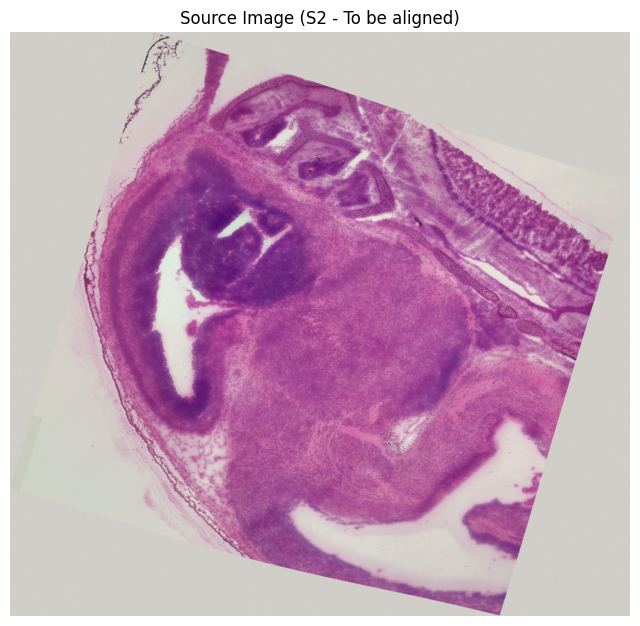

In [2]:
# --- 目录设置 ---
DATA_DIR = "../../SPOmiAlign_Repro"
SAVE_DIR = "../../output"
SAVE_PATH = os.path.join(SAVE_DIR, "img_2_img", "S2toS1")
os.makedirs(SAVE_PATH, exist_ok=True)

img1_path = os.path.join(DATA_DIR, "output_image", "E15_5-S1-HE.jpg") # Target
img2_path = os.path.join(DATA_DIR, "output_image", "E15_5-S2-HE_warped_rt15.png") # Source

print(f"Target: {img1_path}")
print(f"Source: {img2_path}")

# 查看输入图像
show_img(img1_path, "Target Image (S1)")
show_img(img2_path, "Source Image (S2 - To be aligned)")

🚀 开始配准...
Using device: cuda:0


2026-01-04 19:56:09.308 | INFO     | romatch.models.model_zoo.roma_models:roma_model:61 - Using coarse resolution (560, 560), and upsample res (864, 1152)


Running RoMa matching...
Estimating affine+bspline transform...
Warping images...
Padding fill color (from 10,10): [201, 206, 209]


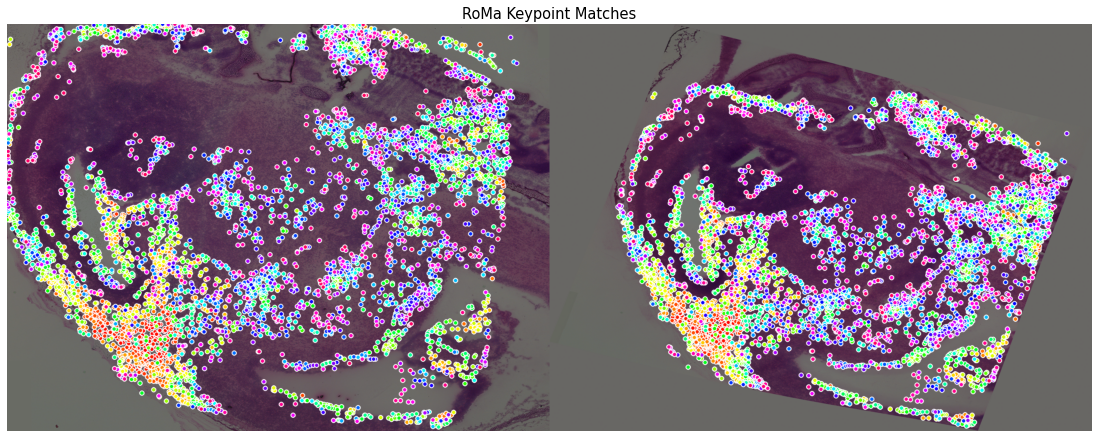

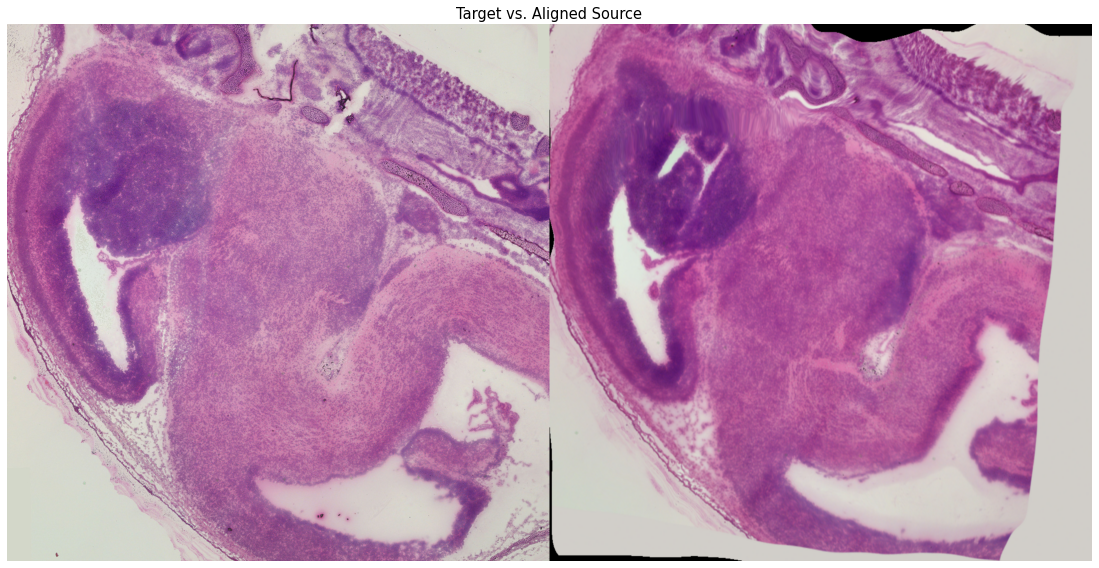

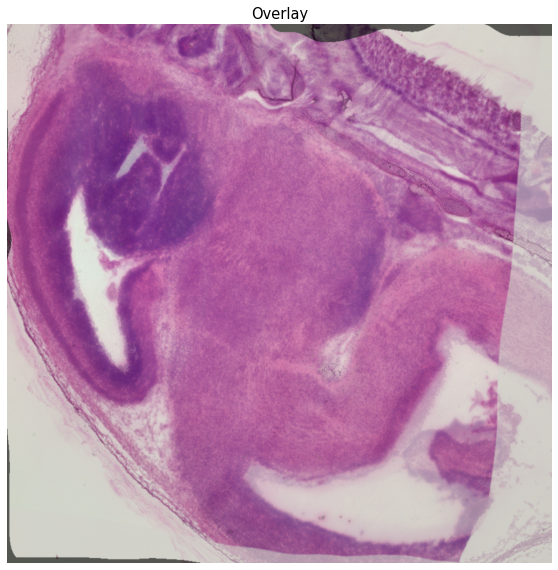

Alignment runtime: 4.8171 seconds
Done. Results saved to ../../output/img_2_img/S2toS1/alignment
✅ 配准完成。


In [3]:
# --- 执行配准 ---
print("🚀 开始配准...")
save_path_alignment = os.path.join(SAVE_PATH, "alignment")

align_and_process_images(
    img1_path=img1_path, 
    img2_path=img2_path,  
    method='affine+bspline', 
    output_dir=save_path_alignment,
    rotate=0.0, 
    scale=1.0,
)
print("✅ 配准完成。")